In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#to read data
dataframe = pd.read_csv('gene_expression.csv')

In [ ]:
#to display data
dataframe.head(n=15)

,Gene One,Gene Two,Cancer
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
5,3.4,7.5,0
6,3.1,6.8,0
7,6.3,4.9,1
8,5.5,8.6,0
9,7.7,3.5,1


In [ ]:
#to display the data size
dataframe.shape

(3000, 3)

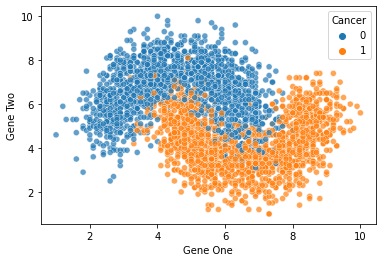

In [ ]:
#to plot scatterplot for exploration
sns.scatterplot(x='Gene One', y='Gene Two', hue='Cancer', data=dataframe, alpha=0.7)

In [ ]:
#to separate X and y and split into test and train data
from sklearn.model_selection import train_test_split
X = dataframe.drop('Cancer',axis=1)
y = dataframe['Cancer']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
#to scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
#to fit the KNN model using k=1
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
#to understand KNN and choose K value
genetest = pd.concat([X_test,y_test], axis=1)

In [ ]:
genetest.shape

(900, 3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


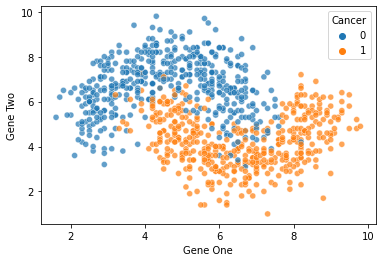

In [ ]:
sns.scatterplot('Gene One', y='Gene Two', hue='Cancer', data=genetest,alpha=0.7)

In [ ]:
#to predict model evaluation
y_pred = knn_model.predict(scaled_X_test)

In [ ]:
#to evaluate model accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.8977777777777778

In [ ]:
confusion_matrix(y_test,y_pred)

array([[410,  48],
       [ 44, 398]])

In [ ]:
testreport = classification_report(y_test,y_pred)
print(testreport)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       458
           1       0.89      0.90      0.90       442

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900



In [ ]:
#to use gridsearchCV
from sklearn.model_selection import GridSearchCV
krange = list(range(1,30))
param_grid = dict(n_neighbors = krange)

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
#defining the range of parameters
grid = GridSearchCV(knn,param_grid, cv=5, scoring='accuracy',return_train_score=False,verbose=1)

In [ ]:
#print("---------------- model optimization(KNN)---------------")
#print(KNeighborsClassifier().get_params())
#print("grid search CV for optmimization... ")
#grid_para_KNN=[{"n_neighbors": np.arange(1, 30)}]
#print("\nparameters for optimization",grid_para_KNN)
#K_fold = StratifiedKFold(n_splits=10, random_state=123, shuffle=True)
#best_para_KNN = GridSearchCV(KNeighborsClassifier(), grid_para_KNN, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
#best_para_KNN.fit(X_train,y_train)
#print("\n Best parameters set found on development set for KNN:")
#print(best_para_KNN.best_params_ , "with a score of ",best_para_KNN.best_score_)


In [ ]:
#to fit the model for grid search
gridsearch = grid.fit(X_train,y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


In [ ]:
print(gridsearch.best_params_)

{'n_neighbors': 16}


In [ ]:
#model evaluation
accuracy = gridsearch.best_score_*100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy))

Accuracy for our training dataset with tuning is : 93.86%


In [ ]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X,y)
y_pred = knn.predict(X_test)
testaccuracy = accuracy_score(y_test,y_pred)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(testaccuracy))

Accuracy for our testing dataset with tuning is : 94.00%


In [ ]:
#confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
confusion_matrix(y_test,y_pred)

array([[432,  26],
       [ 28, 414]])

In [ ]:
#to read new data
test = pd.read_csv('newgene.csv')

In [ ]:
test.head(10)

,Gene One,Gene Two
0,4.3,4.0
1,2.7,6.5
2,1.7,4.0
3,3.1,6.2
4,7.7,3.4
5,4.4,7.6
6,3.1,6.8
7,6.3,4.9
8,5.5,8.6
9,7.8,4.4


In [ ]:
y_pred = knn.predict(test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Gene One 
- Gene Two 
Feature names seen at fit time, yet now missing:
- Gene One
- Gene Two

  warnings.warn(message, FutureWarning)


In [ ]:
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [ ]:
y_pred_df =pd.DataFrame({'Cancer': y_pred.flatten()})
y_pred_df
pd.merge(test,y_pred_df, left_index=True, right_index=True)

,Gene One,Gene Two,Cancer
0,4.3,4.0,1
1,2.7,6.5,0
2,1.7,4.0,0
3,3.1,6.2,0
4,7.7,3.4,1
5,4.4,7.6,0
6,3.1,6.8,0
7,6.3,4.9,0
8,5.5,8.6,0
9,7.8,4.4,1


In [ ]:
#to use K=16
#using pipeline to perform multiple steps
scaler = StandardScaler()
knn16 = KNeighborsClassifier(n_neighbors=16)
#to provide the steps as tuple
operations = [('scaler',scaler),('knn16',knn16)]

In [ ]:
from sklearn.pipeline import Pipeline
pipe = Pipeline(operations)

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn16', KNeighborsClassifier(n_neighbors=16))])

In [ ]:
pipe_pred = pipe.predict(X_test)

In [ ]:
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       458
           1       0.94      0.93      0.94       442

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [ ]:
#select a row of the data
single_sample = X_test.iloc[40]

In [ ]:
single_sample

Gene One    4.0
Gene Two    6.8
Name: 577, dtype: float64

In [ ]:
#to reshape the data like this
single_sample.values.reshape(1,-1)

array([[4. , 6.8]])

In [ ]:
#prediction
pipe.predict(single_sample.values.reshape(1,-1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [ ]:
#the probability
pipe.predict_proba(single_sample.values.reshape(1,-1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[0.9375, 0.0625]])